In [1]:
%load_ext autoreload
%autoreload
from hub_labels import *
from plots import *
from graph_info import *
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

this_dir = os.path.dirname(os.path.realpath('__file__'))
G_dir = os.path.join(this_dir,'Data/LU_costs_var_up')
labels_dir = os.path.join(this_dir, 'LU_results/LU4k_costs_var_B25_labels_frontier')

B=25
G = nx.read_gpickle(G_dir)
I,D,N,Id_map = read_labels(labels_dir)
G = nx.read_gpickle(G_dir)
print nx.number_of_nodes(G)
#plot(G,name='LU',node_size=0.1)

30674


4026


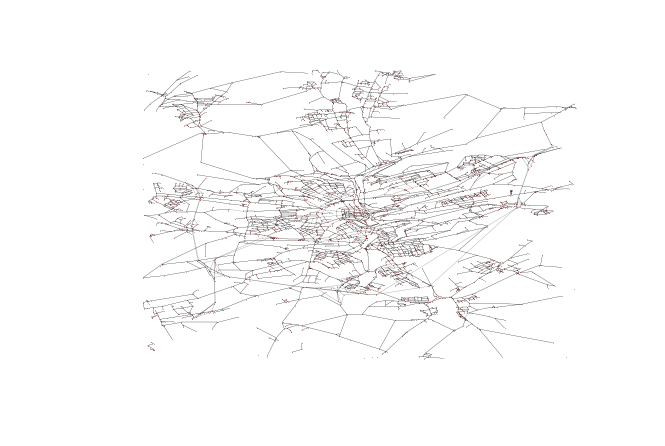

In [2]:
lat0 = 49.610958
lon0 = 6.131130
dlat = 0.065
dlon = 0.065
for u in G.nodes():
    (x,y)=G.node[u]['XY']
    if abs(y-lat0)>dlat or abs(x-lon0)>dlon:
        G.remove_node(u)
print nx.number_of_nodes(G)

plot(G,name='LU_city',node_size=0.1)
#nx.write_gpickle(G,'LU4k_costs_var_up')

In [6]:
import gmplot
lats = []
lons = []
gradient = [(0, 255, 255, 0),(0, 255, 255, 1),(0, 191, 255, 1),(0, 127, 255, 1),(0, 63, 255, 1),(0, 0, 255, 1),(0, 0, 223, 1),
          (0, 0, 191, 1), (0, 0, 159, 1),          (0, 0, 127, 1),          (63, 0, 91, 1),          (127, 0, 63, 1),
          (191, 0, 31, 1),          (255, 0, 0, 1)]
gradient2 = [(255, 0, 0, 0),(231, 76, 60, 1),(0, 0, 0, 1)]
for k in I[1]:
    for i in I[1][k]:
        (u,b) = Id_map[i]
        (x,y) = G.node[u]['XY']
        lats.append(y)
        lons.append(x)
gmap = gmplot.GoogleMapPlotter(49.611655, 6.130830, 14)
gmap.heatmap(lats,lons,opacity=1,radius=15,gradient=gradient2)
gmap.draw("LU_significance_heatmap.html")

In [ ]:
#plot ranking of nodes
C_dir = os.path.join(this_dir,'Data/LU_data_C')
with open(C_dir, "rb") as f:
    dic = pickle.load(f)
C = dic['C']
rank = {}
for i in xrange(0,len(C)):
    rank[C[i]] = 1+len(C)-i
    
import gmplot
lats = []
lons = []

for v in G.nodes():
    for i in xrange(0,rank[v]):
        (x,y) = G.node[v]['XY']
        lats.append(y)
        lons.append(x)
gmap = gmplot.GoogleMapPlotter(49.611655, 6.130830, 13)
gmap.heatmap(lats,lons,opacity=1,radius=15,gradient=gradient2)
gmap.draw("LU_rank_heatmap.html")    
print 'a'
#plot_node_attributes(G,rank,name="rank")  
